# CS5489 - Tutorial 3
## Gender Classification from Face Images

In this tutorial you will train a classifier to predict whether a face image is male or female.

First we need to initialize Python.  Run the below cell.

In [37]:
%matplotlib inline
import IPython.core.display         
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import os
import zipfile
import fnmatch
random.seed(100)

## Loading Data and Pre-processing
We first need to load the images.  Download `photos-bw.zip` and put it in the same directory as this ipynb file.  **Do not unzip the file.** Then run the following cell to load the images.

In [2]:
imgdata = []
genders = []

# load the zip file
filename = 'photos-bw.zip'
zfile = zipfile.ZipFile(filename, 'r')

for name in zfile.namelist():
    # check file name matches
    if fnmatch.fnmatch(name, "photos-bw/*.png"):
        print("loading", name)
        # open file in memory, and parse as an image
        myfile = zfile.open(name)
        img = matplotlib.image.imread(myfile)
        myfile.close()
        
        # append to data
        imgdata.append(img)
        genders.append( int(name[len("photos-bw/")] == 'm') )  # 0 is female, 1 is male
        
zfile.close()
imgsize = img.shape
print("DONE: loaded {} images".format(len(imgdata)))

loading photos-bw/f-039-01.png
loading photos-bw/f-040-01.png
loading photos-bw/f-041-01.png
loading photos-bw/f-042-01.png
loading photos-bw/f-043-01.png
loading photos-bw/f1-001-0.png
loading photos-bw/f1-002-0.png
loading photos-bw/f1-003-0.png
loading photos-bw/f1-004-0.png
loading photos-bw/f1-005-0.png
loading photos-bw/f1-006-0.png
loading photos-bw/f1-007-0.png
loading photos-bw/f1-008-0.png
loading photos-bw/f1-009-0.png
loading photos-bw/f1-010-0.png
loading photos-bw/f1-011-0.png
loading photos-bw/f1-012-0.png
loading photos-bw/f1-013-0.png
loading photos-bw/f1-014-0.png
loading photos-bw/f1-015-0.png
loading photos-bw/m-063-01.png
loading photos-bw/m-064-01.png
loading photos-bw/m-065-01.png
loading photos-bw/m-067-01.png
loading photos-bw/m-069-01.png
loading photos-bw/m-070-01.png
loading photos-bw/m-073-01.png
loading photos-bw/m-074-01.png
loading photos-bw/m-075-01.png
loading photos-bw/m-077-01.png
loading photos-bw/m-083-01.png
loading photos-bw/m-085-01.png
loading 

Each image is a 45x40 array of pixel values.  Run the below code to show an example:

(45, 40)


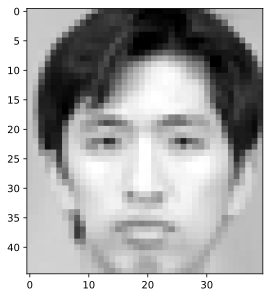

In [3]:
print(img.shape)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

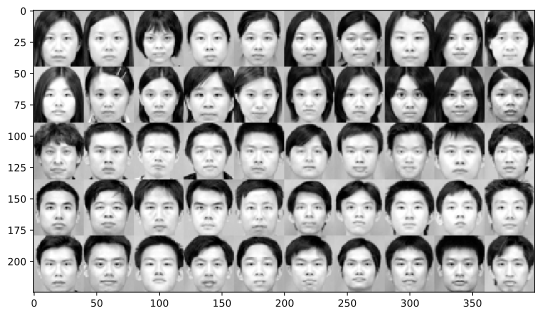

In [4]:
# function to make an image montage
def image_montage(X, imsize=None, maxw=10):
    """X can be a list of images, or a matrix of vectorized images.
      Specify imsize when X is a matrix."""
    tmp = []
    numimgs = len(X)
    
    # create a list of images (reshape if necessary)
    for i in range(0,numimgs):
        if imsize != None:
            tmp.append(X[i].reshape(imsize))
        else:
            tmp.append(X[i])
    
    # add blanks
    if (numimgs > maxw) and (mod(numimgs, maxw) > 0):
        leftover = maxw - mod(numimgs, maxw)
        meanimg = 0.5*(X[0].max()+X[0].min())
        for i in range(0,leftover):
            tmp.append(ones(tmp[0].shape)*meanimg)
    
    # make the montage
    tmp2 = []
    for i in range(0,len(tmp),maxw):
        tmp2.append( hstack(tmp[i:i+maxw]) )
    montimg = vstack(tmp2) 
    return montimg

plt.figure(figsize=(9,9))
plt.imshow(image_montage(imgdata), cmap='gray', interpolation='nearest')
plt.show()

Each image is a 2d array, but the classifier algorithms work on 1d vectors. Run the following code to convert all the images into 1d vectors by flattening.  The result should be a matrix where each row is a flattened image.

In [5]:
X = empty((50, prod(imgdata[0].shape))) # create empty array
for i,img in enumerate(imgdata):
    X[i,:] = ravel(img)           # for each image, turn it into a vector
Y = asarray(genders)  # convert list to numpy array
print(X.shape)
print(Y.shape)

(50, 1800)
(50,)


Next we will shift the pixel values so that gray is 0.0, black is -0.5 and white is 0.5.

In [6]:
print("Before: min={}, max={}".format(X.min(), X.max()))
X -= 0.5
print("After:  min={}, max={}".format(X.min(), X.max()))

Before: min=0.0, max=1.0
After:  min=-0.5, max=0.5


Finally, split the dataset into a training set and testing set. We select 80% for training and 20% for testing.

In [7]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  model_selection.train_test_split(X, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainX.shape)
print(testX.shape)

(40, 1800)
(10, 1800)


In [8]:
# compute the average image for later
avgX = mean(X, axis=0)

# Logistic Regression
Train a logistic regression classifier.  Use cross-validation to select the best C parameter.

**NOTE:** If you are running on DeepDive server, the number of visible CPUs is 32, which is shared among all students. Please do not use `n_jobs=-1`!!  Instead use `n_jobs=4` or `n_jobs=8`.

In [ ]:
### INSERT YOUR CODE HERE

w= [[0.00035113 0.00040657 0.00049916 ... 0.01334931 0.01042594 0.01006051]]
b= [-0.07932328]
C = [0.01274275]


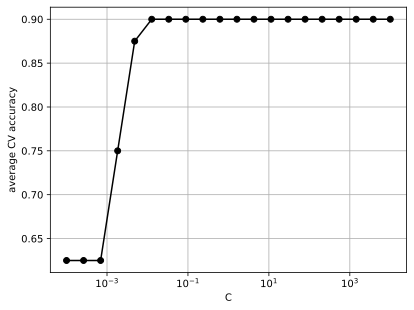

In [25]:
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=4)
logreg.fit(trainX, trainY)
print("w=", logreg.coef_)
print("b=", logreg.intercept_)

print("C =", logreg.C_)
# calculate the average score for each C
avgscores = mean(logreg.scores_[1], 0) 
# 2 is the class label
plt.semilogx(logreg.Cs_, avgscores, 'ko-')
plt.xlabel('C')
plt.ylabel('average CV accuracy')
plt.grid(True)

Use the learned model to predict the genders for the training and testing data. What is the accuracy on the training set? What is the accuracy on the testing set?

In [ ]:
### INSERT YOUR CODE HERE

In [26]:
# predict from the model
predYtrain = logreg.predict(trainX)
predYtest = logreg.predict(testX)

# calculate accuracy
acc = metrics.accuracy_score(trainY, predYtrain)
print("train accuracy=", acc)
acc = metrics.accuracy_score(testY, predYtest)
print("test accuracy=", acc)

train accuracy= 0.9
test accuracy= 0.8


## Analyzing the classifier
Run the below code to show the hyperplane parameter $\mathbf{w}$ as an image.  

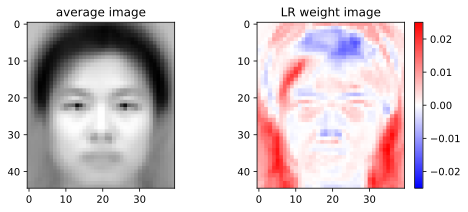

In [27]:
# logreg is the learned logistic regression model
wimg = logreg.coef_.reshape(imgsize)
# get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight image")
plt.show()

Recall that the classifier prediction is based on the sign of the function $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}+b = \sum_{i=1}^P w_ix_i + b$.  Here each $x_i$ is a pixel in the face image, and $w_i$ is the corresponding weight.  Hence, the function is multiplying face image by the weight image, and then summing over all pixels.

In order for $f(\mathbf{x})$ to be positive, then the positive values of the weight image (red regions) should match the positive values in the face image (white pixels), and the negative values of the weight image (blue regions) should be matched with negative values in the face image (black pixels).

Hence, we can have the following interpretation:
<table>
<tr><th>Class</th><th>red regions (positive weights)</th><th>blue regions (negative weights)</th><th>white regions (weights near 0)</th></tr>
<tr><td>+1 class (male)</td><td>white pixels in face image</td><td>black pixels in face image</td><td>region not important</td></tr>
<tr><td>-1 class (female)</td><td>black pixels in face image</td><td>white pixels in face image</td><td>region not important</td></tr>
</table>
  
_Looking at the weight image, what parts of the face image is the classifier looking at to determine the gender?  Does it make sense?_

- **INSERT YOUR ANSWER HERE**
- Women's hair is longer and longer than men's, so the proportion of black pixels is heavier. Compared with men's face, there is less beard, so they pay more attention to white pixels.
- The hair of men is generally shorter than that of women, so the proportion of white pixels is heavier. Compared with women, the face has more beard, so the face pays more attention to black pixels.
- Relatively reasonable, in line with most laws.

Now let's look at the misclassified faces in the test set.  Run the below code to show the misclassifed and correctly classified faces.

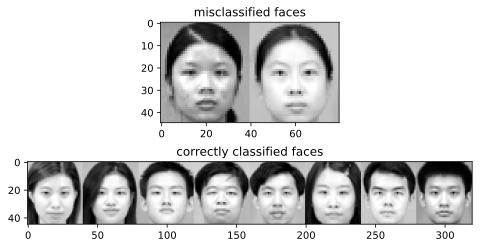

In [20]:
# predYtest are the class predictions on the test set.

# find misclassified test images
inds = where(predYtest != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()

_Why did the classifier make incorrect predictions on the misclassified faces?_
- **INSERT YOUR ANSWER HERE**

- Girls with wrong classification have short hair, more white pixels on the background, and more melanin due to acne on the face, which is in line with the general characteristics of men learned.

# Support Vector Machine
Now train a support vector machine (SVM) on the same training and testing data.  Use cross-validation to select the best $C$ parameter.

In [ ]:
### INSERT YOUR CODE HERE

{'C': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02, 4.64158883e+02, 2.15443469e+03,
       1.00000000e+04])}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
{'C': 0.01}
0.9
SVC(C=0.01, kernel='linear')


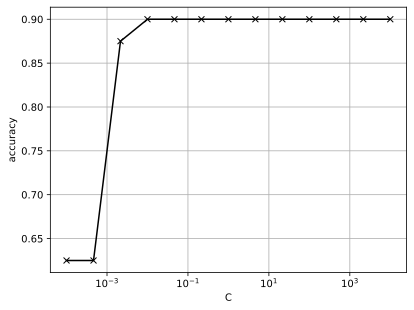

In [45]:
# setup the list of parameters to try
paramgrid = {'C': logspace(-4,4,13)}
print(paramgrid)

# setup the cross-validation object
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), paramgrid, cv=5, n_jobs=4, verbose=True)

# run cross-validation (train for each split)
svmcv.fit(trainX, trainY)

# show the test error for each parameter set
# for m,p in zip(svmcv.cv_results_['mean_test_score'], svmcv.cv_results_['params']):
    # print("mean={:.4f} {}".format(m, p))

# make a plot for param C
allC = [p['C'] for p in svmcv.cv_results_['params']]
allscores = svmcv.cv_results_['mean_test_score']
plt.figure()
plt.semilogx(allC, allscores, 'kx-')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.grid(True)

# view best results and best retrained estimator
print(svmcv.best_params_)
print(svmcv.best_score_)
print(svmcv.best_estimator_)

Calculate the training and test accuracy for the SVM classifier.

In [ ]:
### INSERT YOUR CODE HERE

In [23]:
# predict from the model
predYtrain = svmcv.predict(trainX)
predYtest = svmcv.predict(testX)

# calculate accuracy
acc = metrics.accuracy_score(trainY, predYtrain)
print("train accuracy=", acc)
acc = metrics.accuracy_score(testY, predYtest)
print("test accuracy=", acc)

train accuracy= 0.925
test accuracy= 0.8


Similar to before, plot an image of the hyperplane parameters $w$, and view the misclassified and correctly classified test images.

In [ ]:
### INSERT YOUR CODE HERE

w: [0.00063323 0.00072113 0.00073357 ... 0.00931227 0.00373131 0.00613248]
b -0.18178035520868846


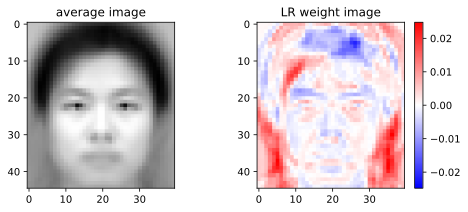

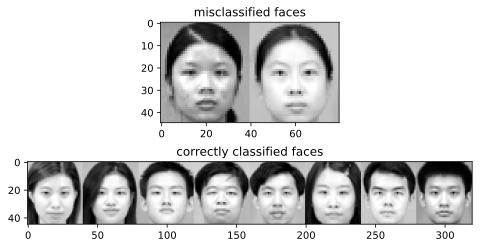

In [31]:
# fit the SVM using all the data and the best C
# to show w in best param
clf = svm.SVC(kernel='linear', C=svmcv.best_params_['C'])
clf.fit(trainX, trainY)
# get line parameters
w = clf.coef_[0]
b = clf.intercept_[0]
print("w:", w)
print("b", b)

wimg = clf.coef_[0].reshape(imgsize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight image")
plt.show()

# predYtest are the class predictions on the test set.
# find misclassified test images
inds = where(predYtest != testY)  # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2, 1, 2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()

_Are there any differences between the $w$ for logistic regressiona and the $w$ for SVM?  Is there any interpretation for the differences?_

- **INSERT YOUR ANSWER HERE**

Support vector machines learn higher dimensional information than linear regression, because linear regression has high consistency in the weight of similar regions on the two-dimensional image, and support vector machines have similar positions, which may be far from the learned dimensional space. As can be seen from the facial features, the weight of support vector machine is positive and the weight of cheek is negative.


# Classifying cropped faces
It seems that the hair around the face and forehead are discriminative enough to perform gender classifixation. Now try to perform the same task but only focusing on the face image, and not the hair.

First, we define a mask over the face.

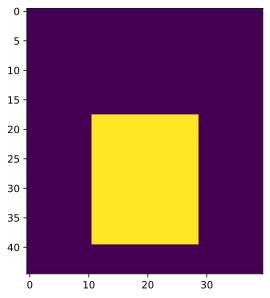

In [32]:
imgmask = full((img.shape), False)
#imgmask[17:41,8:32] = True
#masksize = (24,24)
imgmask[18:40,11:29] = True
masksize = (22,18)
plt.imshow(imgmask)

Next we crop out the face image to create the new inputs.  The vectors are now 576-dim, and corresponding images are 24x24.

In [33]:
Xm = X[:,imgmask.ravel()]
Xm.shape

(50, 396)

Here are the cropped images.

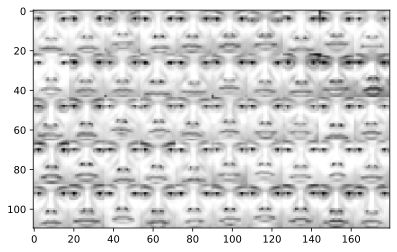

In [38]:
plt.imshow(image_montage(Xm, imsize=masksize), cmap='gray', interpolation='nearest')

Generate the same training/test split as before

In [39]:
# randomly split data into 80% train and 20% test set
trainXm, testXm, trainY, testY = \
  model_selection.train_test_split(Xm, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainXm.shape)
print(testXm.shape)

(40, 396)
(10, 396)


In [40]:
avgXm = avgX[imgmask.ravel()]

Now train logistic regression and SVM classifiers on the new cropped images.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

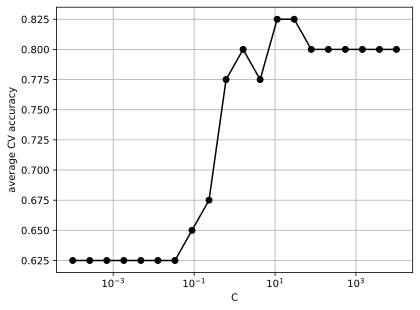

In [49]:
### INSERT YOUR CODE HERE
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=4)
logreg.fit(trainXm, trainY)
# print("w=", logreg.coef_)
# print("b=", logreg.intercept_)

# print("C =", logreg.C_)
# calculate the average score for each C
avgscores = mean(logreg.scores_[1], 0) 
# 2 is the class label
plt.semilogx(logreg.Cs_, avgscores, 'ko-')
plt.xlabel('C')
plt.ylabel('average CV accuracy')
plt.grid(True)

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 0.615848211066026}
0.8
SVC(C=0.615848211066026, kernel='linear')


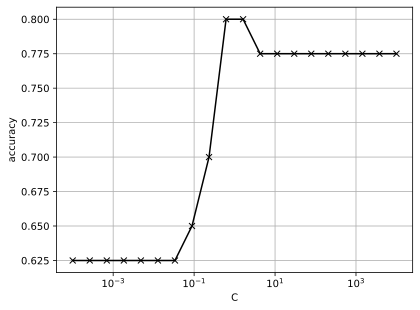

In [50]:
### INSERT YOUR CODE HERE
# setup the list of parameters to try
paramgrid = {'C': logspace(-4,4,20)}
print(paramgrid)

# setup the cross-validation object
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), paramgrid, cv=5, n_jobs=4, verbose=True)

# run cross-validation (train for each split)
svmcv.fit(trainXm, trainY)

# show the test error for each parameter set
# for m,p in zip(svmcv.cv_results_['mean_test_score'], svmcv.cv_results_['params']):
    # print("mean={:.4f} {}".format(m, p))

# make a plot for param C
allC = [p['C'] for p in svmcv.cv_results_['params']]
allscores = svmcv.cv_results_['mean_test_score']
plt.figure()
plt.semilogx(allC, allscores, 'kx-')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.grid(True)

# view best results and best retrained estimator
print(svmcv.best_params_)
print(svmcv.best_score_)
print(svmcv.best_estimator_)

In [ ]:
### INSERT YOUR CODE HERE

Compute the train/test accuracies of the two classifiers.

In [52]:
### INSERT YOUR CODE HERE
# predict from the model
predYtrain = logreg.predict(trainXm)
predYtest = logreg.predict(testXm)

# calculate accuracy
acc = metrics.accuracy_score(trainY, predYtrain)
print("train accuracy=", acc)
acc = metrics.accuracy_score(testY, predYtest)
print("test accuracy=", acc)

train accuracy= 1.0
test accuracy= 0.8


In [53]:
### INSERT YOUR CODE HERE
# predict from the model
predYtrain = svmcv.predict(trainXm)
predYtest = svmcv.predict(testXm)

# calculate accuracy
acc = metrics.accuracy_score(trainY, predYtrain)
print("train accuracy=", acc)
acc = metrics.accuracy_score(testY, predYtest)
print("test accuracy=", acc)

train accuracy= 0.95
test accuracy= 0.8


Compare the classification performance? Which performs better and why?

- **INSERT YOUR ANSWER HERE**

- The same, but SVM maybe better, because linear regression is overfit.

Visualize the weights as an image and interpret what discriminative information each classifier is using.

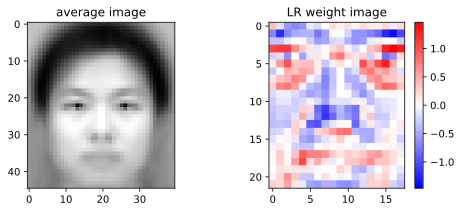

In [56]:
### INSERT YOUR CODE HERE
# logreg is the learned logistic regression model
wimg = logreg.coef_.reshape(masksize)
# get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight image")
plt.show()

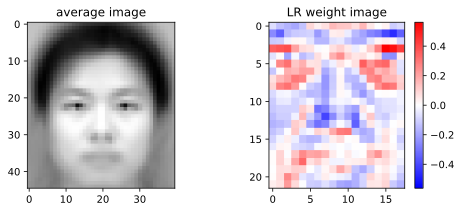

In [59]:
### INSERT YOUR CODE HERE
# fit the SVM using all the data and the best C
# to show w in best param
clf = svm.SVC(kernel='linear', C=svmcv.best_params_['C'])
clf.fit(trainXm, trainY)
# get line parameters
w = clf.coef_[0]
b = clf.intercept_[0]
# print("w:", w)
# print("b", b)

wimg = clf.coef_[0].reshape(masksize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight image")
plt.show()


- **INSERT YOUR ANSWER HERE**

